In [9]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

import seaborn as sns

import iris 
import iris.coord_categorisation
import iris.quickplot as qplt
import iris.plot as iplt
import iris.analysis.cartography
import cartopy.crs as ccrs
from matplotlib.ticker import ScalarFormatter
import cf_units
import pandas as pd
import iris.pandas as ip

#import ntiris as nt
import scipy.stats
from iris.analysis.stats import pearsonr

import locale
locale.setlocale(locale.LC_ALL, "en_US.utf8")

NPS_proj = ccrs.NorthPolarStereo()
PC_proj = ccrs.PlateCarree()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#%matplotlib notebook

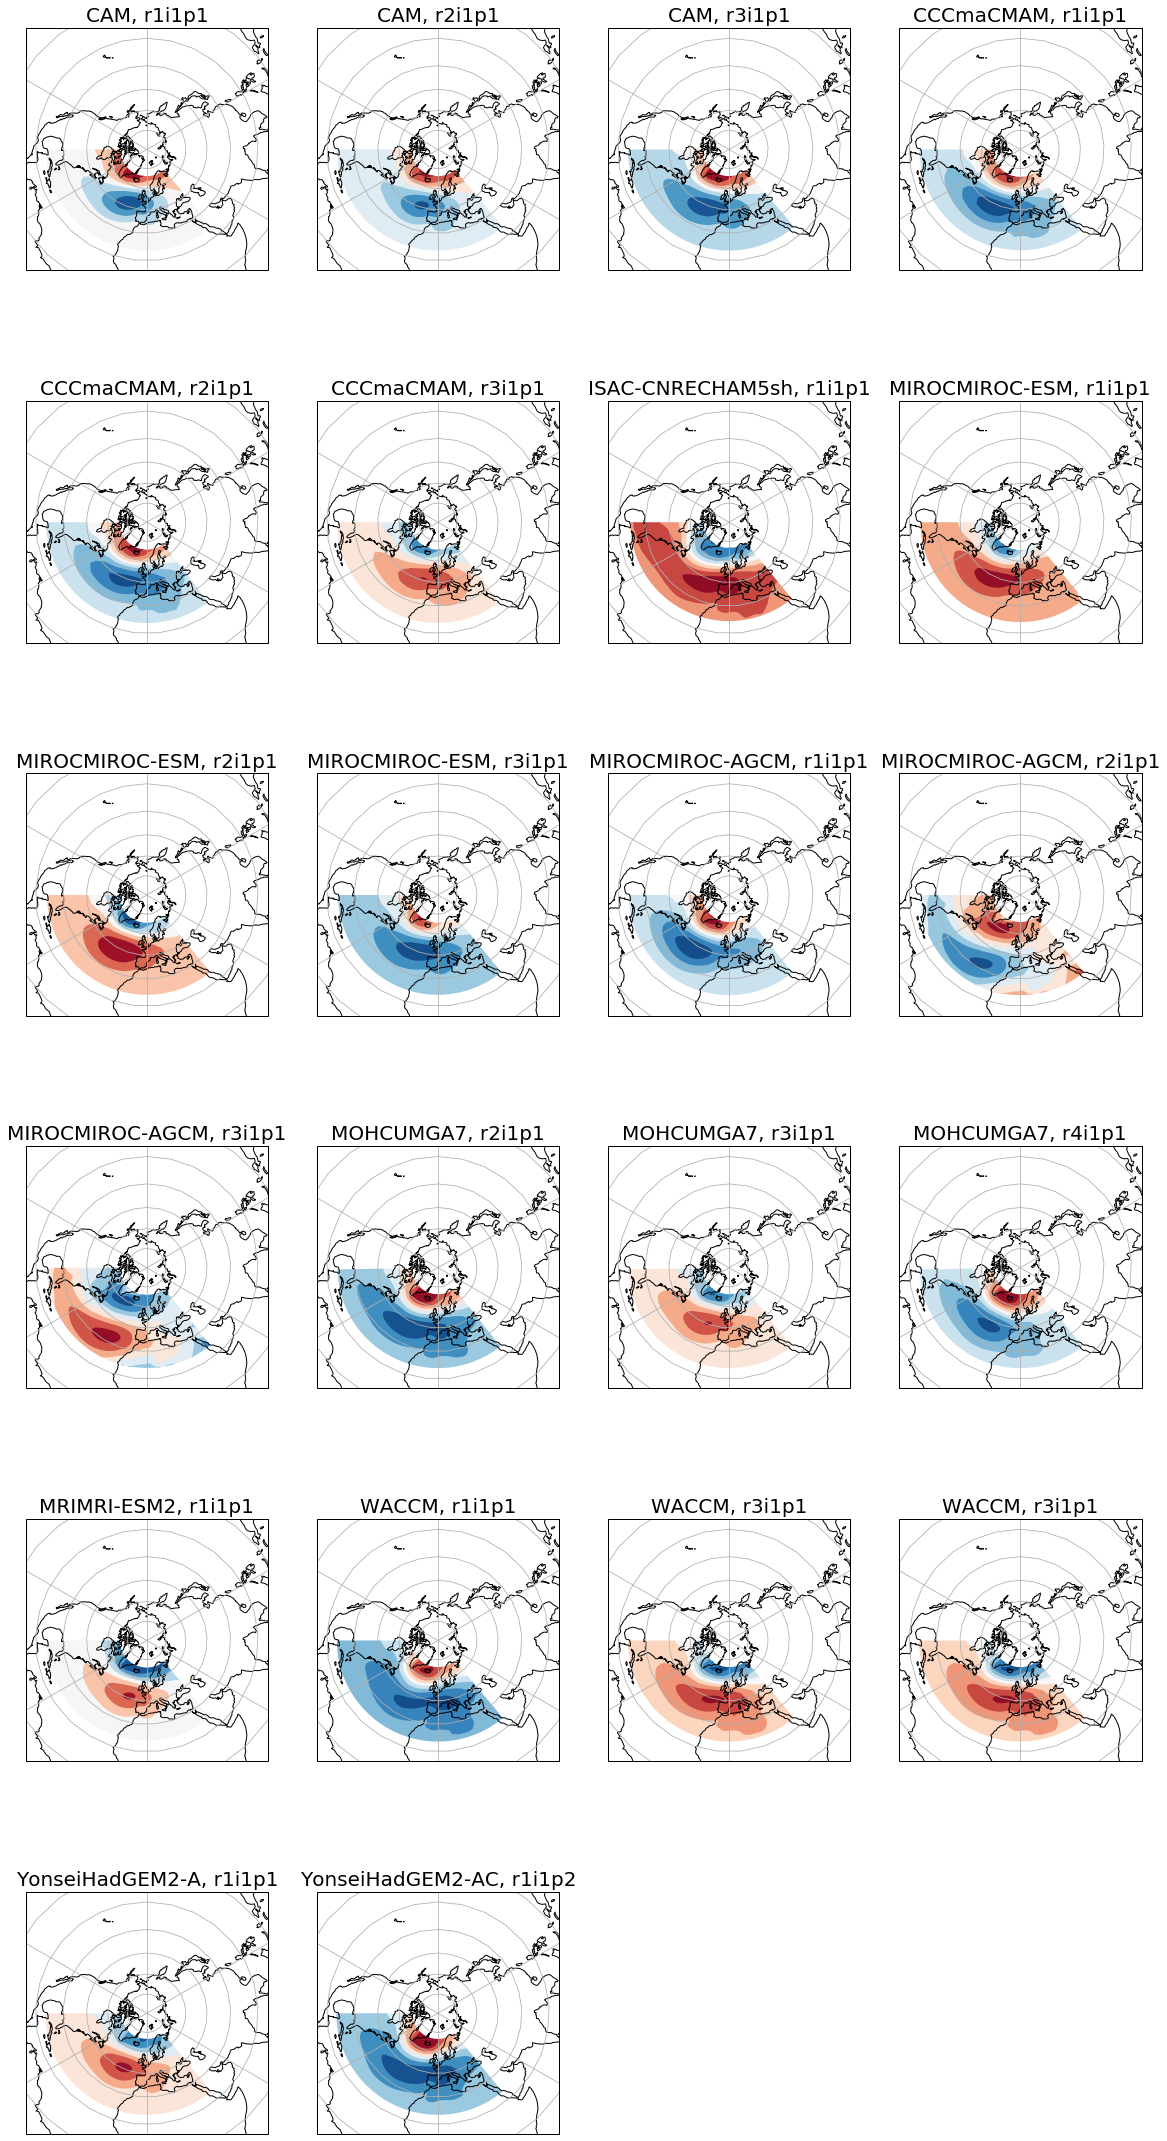

In [10]:
mlist = [['CAM','r1i1p1'],['CAM','r2i1p1'],['CAM','r3i1p1'], 
         ['CCCmaCMAM','r1i1p1'],['CCCmaCMAM','r2i1p1'],['CCCmaCMAM','r3i1p1'], 
         ['ISAC-CNRECHAM5sh','r1i1p1'],
         ['MIROCMIROC-ESM','r1i1p1'],['MIROCMIROC-ESM','r2i1p1'],['MIROCMIROC-ESM','r3i1p1'],
         ['MIROCMIROC-AGCM','r1i1p1'],['MIROCMIROC-AGCM','r2i1p1'],['MIROCMIROC-AGCM','r3i1p1'], 
         ['MOHCUMGA7','r2i1p1'],['MOHCUMGA7','r3i1p1'],['MOHCUMGA7','r4i1p1'],
         ['MRIMRI-ESM2','r1i1p1'], 
         ['WACCM','r1i1p1'],['WACCM','r3i1p1'],['WACCM','r3i1p1'], 
         ['YonseiHadGEM2-A','r1i1p1'],
         ['YonseiHadGEM2-AC','r1i1p2']]

cmap = "RdBu_r"

fig = plt.figure(figsize=(20,40))
for j, m in enumerate(mlist):
    imon_all = iris.load_cube(f'/home/tyrrell/research/qbo/qboi/cen_data/nao_eof1_mon_{m[0]}_QBOiExp1_{m[1]}_mon.nc')[0,::]
    imon_all = imon_all.intersection(longitude=(-90,40))
    iris.util.promote_aux_coord_to_dim_coord(imon_all,'longitude')
    ax1 = fig.add_subplot(6,4,j+1,projection=NPS_proj)
    ax1.set_extent((-180, 180, 10, 90),crs=PC_proj); ax1.coastlines()
    im = iplt.contourf(imon_all,cmap=cmap) #,levels=tlevels,alpha=alpha,extend='max')
    ax1.gridlines(crs=PC_proj, linestyle='-')
    plt.title(f"{m[0]}, {m[1]}",fontsize=20)

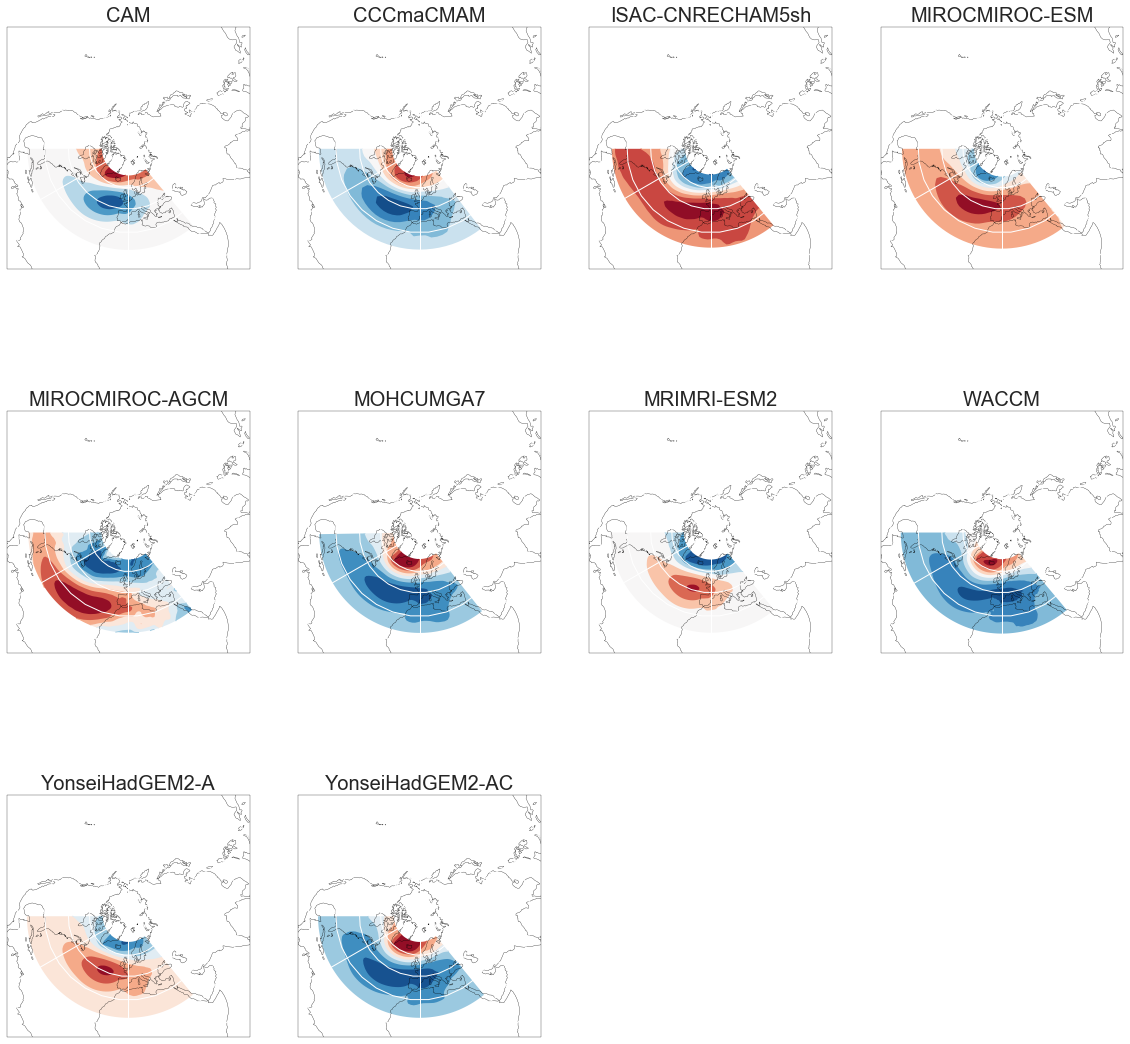

In [8]:
mlist = ['CAM', 'CCCmaCMAM', 'ISAC-CNRECHAM5sh',  'MIROCMIROC-ESM', 'MIROCMIROC-AGCM', 'MOHCUMGA7',
         'MRIMRI-ESM2', 'WACCM', 'YonseiHadGEM2-A', 'YonseiHadGEM2-AC']
cmap = "RdBu_r"

fig = plt.figure(figsize=(20,20))
for j, m in enumerate(mlist):
    imon_all = iris.load_cube(f'/home/tyrrell/research/qbo/qboi/ncfiles/nao_eof1_mon_{m}_QBOiExp1_r*i1p*_mon.nc')[0,::]
    imon_all = imon_all.intersection(longitude=(-90,40))
    iris.util.promote_aux_coord_to_dim_coord(imon_all,'longitude')
    ax1 = fig.add_subplot(3,4,j+1,projection=NPS_proj)
    ax1.set_extent((-180, 180, 10, 90),crs=PC_proj); ax1.coastlines()
    im = iplt.contourf(imon_all,cmap=cmap) #,levels=tlevels,alpha=alpha,extend='max')
    ax1.gridlines(crs=PC_proj, linestyle='-')
    plt.title(m,fontsize=20)
#    plt.ylim((-5,5))
    
#plt.xlim((5.45,17.55))
#plt.grid('on')
#plt.savefig(f'/home/tyrrell/research/qbo/qboi/figures/qboi_clim_{v}.png')
#plt.savefig(f'/home/tyrrell/research/writing/2018_Kyoto/figures/qboi_clim_{v}.png')
#qplt.plot(imon_clim)


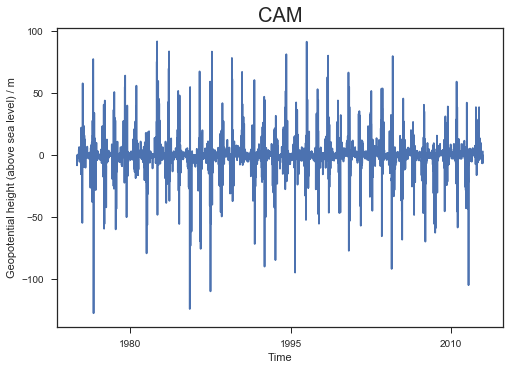

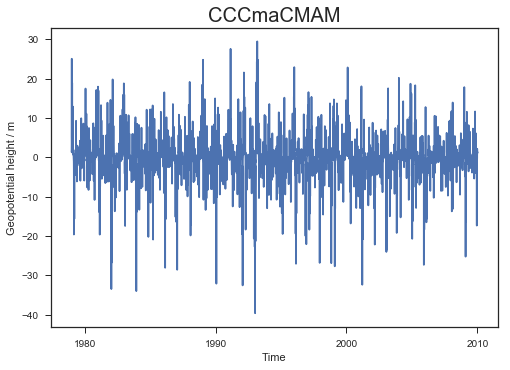

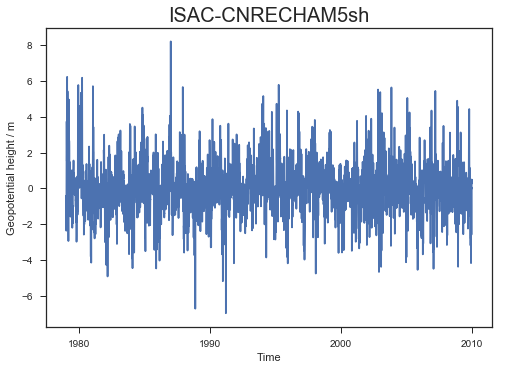

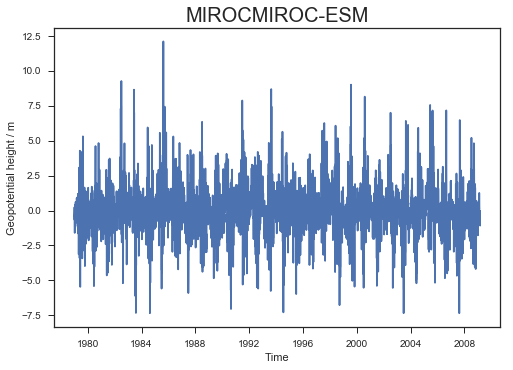

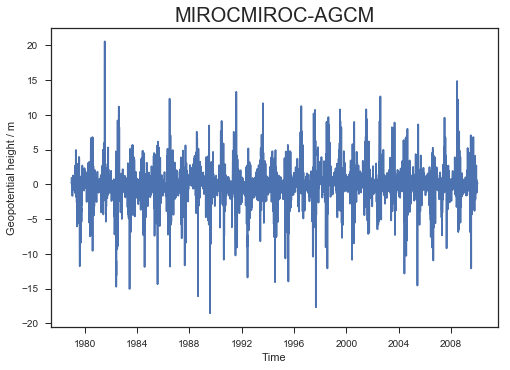

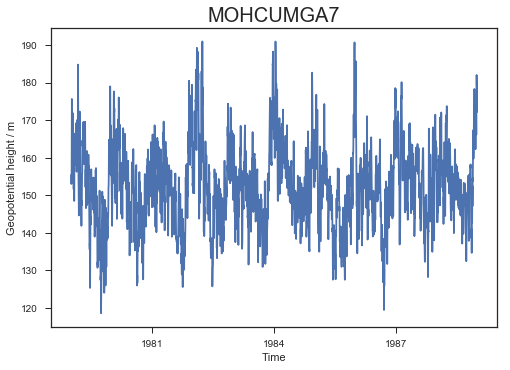

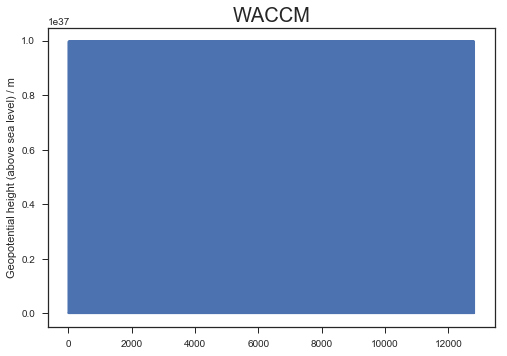

In [9]:
mlist = ['CAM', 'CCCmaCMAM', 'ISAC-CNRECHAM5sh',  'MIROCMIROC-ESM', 'MIROCMIROC-AGCM', 'MOHCUMGA7',
         'WACCM']
#         'MRIMRI-ESM2', 'WACCM', 'YonseiHadGEM2-A', 'YonseiHadGEM2-AC']

for j, m in enumerate(mlist):
    #print(m)
    plt.figure()
    imon_all = iris.load_cube(f'/home/tyrrell/research/qbo/qboi/ncfiles/AO_{m}_QBOiExp1_r1i1p1_day.nc')[:,0,0,0]
    imon_clim = iris.load_cube(f'/home/tyrrell/research/qbo/qboi/ncfiles/AO_{m}_QBOiExp1_r1i1p1_day.clim.nc')[:,0,0,0]
    imon_std = iris.load_cube(f'/home/tyrrell/research/qbo/qboi/ncfiles/AO_{m}_QBOiExp1_r1i1p1_mon.std.nc')[:,0,0,0]
#    print(imon_clim)
    qplt.plot(imon_all)
    plt.title(m,fontsize=20)
#    plt.ylim((-5,5))
    
#plt.xlim((5.45,17.55))
#plt.grid('on')
#plt.savefig(f'/home/tyrrell/research/qbo/qboi/figures/qboi_clim_{v}.png')
#plt.savefig(f'/home/tyrrell/research/writing/2018_Kyoto/figures/qboi_clim_{v}.png')
#qplt.plot(imon_clim)


In [81]:
print(m)

CAM


In [84]:
#imon_clim = iris.load('/home/tyrrell/research/qbo/qboi/ncfiles/Sib-SLP_CAM_QBOiExp1_r1i1p1_mon_clim.nc')
imon_clim = iris.load_cube('/home/tyrrell/research/qbo/qboi/ncfiles/cclim.nc')
#imon_std = iris.load_cube('/home/tyrrell/research/qbo/qboi/ncfiles/Sib-SLP_CAM_QBOiExp1_r1i1p1_mon_std.nc')[:,0,0,0]
#iris.coord_categorisation.add_month(imon_clim,'time',name='month')
print(imon_clim)
#qplt.plot(imon_clim)

Sea level pressure / (Pa)           (-- : 12; latitude: 1; longitude: 1)
     Dimension coordinates:
          latitude                      -             x             -
          longitude                     -             -             x
     Auxiliary coordinates:
          time                          x             -             -
     Attributes:
          CDI: Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.4 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          NCO: "4.5.4"
          Version: $Name$
          case: QBOi.EXP1.AMIP.001                                                    ...
          history: Wed Sep 26 16:56:14 2018: ncks -x -v date Sib-SLP_CAM_QBOiExp1_r1i1p1_mon_clim.nc...
          host: ys1028          
          initial_file: /glade/p/work/jrichter/60Lcam5301_B6ORO1F85/cami_waccm_L60.nc         ...
          interp_outputgridtype: equally spaced with poles
          interp_type: 

/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))


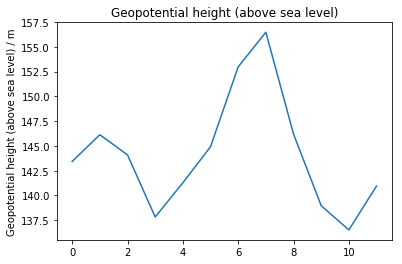

In [3]:

imon_clim = iris.load_cube('/home/tyrrell/research/qbo/qboi/ncfiles/AO_CAM_QBOiExp1_r1i1p1_mon_clim.nc')[:,0,0,0]
imon_std = iris.load_cube('/home/tyrrell/research/qbo/qboi/ncfiles/AO_CAM_QBOiExp1_r1i1p1_mon_std.nc')[:,0,0,0]
mon_clim = np.linspace(0,23,24)
mon_std = np.linspace(0,23,24)
mon_clim[0:12] = imon_clim.data

qplt.plot(mon_clim)
mon = np.linspace(0,23,24)

plt.plot(mon[0:10],sfrut_clim[8:18],color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(mon[0:10],sa_sf_clim[0:10],color='k',label='ECHAM6 SNOW',linewidth=2)
plt.title('Seasonal cycle of Eurasian snow extent',fontsize=22)
plt.xticks(mon[0:10],['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],fontsize=20)
plt.yticks(fontsize=20)
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.legend(loc=8,fontsize=15) 
plt.grid('on',ls='--')

plt.fill_between(mon[0:10],rut_max[8:18],
                 rut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sfrut_max[8:18],
                 sfrut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sa_sf_max[0:10],
                 sa_sf_min[0:10],color='k',alpha=0.15)

plt.fill_between(mon[0:10],sa_sf_clim[0:10]+sa_sf_std[0:10],
                 sa_sf_clim[0:10]-sa_sf_std[0:10],color='k',alpha=0.3)
plt.fill_between(mon[0:10],rut_clim[8:18]+rut_std[8:18],
                 rut_clim[8:18]-rut_std[8:18],color='k',alpha=0.3)
plt.fill_between(mon[0:10],sfrut_clim[8:18]+sfrut_std[8:18],
                 sfrut_clim[8:18]-sfrut_std[8:18],color='k',alpha=0.3)
plt.text(-0.1,35,'(a)',fontsize=30)
plt.tight_layout()


In [3]:

cam = iris.load_cube("nc_vflux/v_flux_CAM_QBOiExp1_r1i1p1_day.nc")
cccmacmam = iris.load_cube("nc_vflux/v_flux_CCCmaCMAM_QBOiExp1_r1i1p1_day.nc")
isac_cnrecham5sh = iris.load_cube("nc_vflux/v_flux_ISAC-CNRECHAM5sh_QBOiExp1_r1i1p1_day.nc")
mirocmiroc_agcm = iris.load_cube("nc_vflux/v_flux_MIROCMIROC-AGCM_QBOiExp1_r1i1p1_day.nc")
mirocmiroc_esm = iris.load_cube("nc_vflux/v_flux_MIROCMIROC-ESM_QBOiExp1_r1i1p1_day.nc")
mohcumga7 = iris.load_cube("nc_vflux/v_flux_MOHCUMGA7_QBOiExp1_r2i1p1_day.nc")
waccm = iris.load_cube("nc_vflux/v_flux_WACCM_QBOiExp1_r1i1p1_day.nc")

cam_mon = iris.load_cube("nc_vflux/v_flux_CAM_QBOiExp1_r1i1p1_mon.nc")
cccmacmam_mon = iris.load_cube("nc_vflux/v_flux_CCCmaCMAM_QBOiExp1_r1i1p1_mon.nc")
isac_cnrecham5sh_mon = iris.load_cube("nc_vflux/v_flux_ISAC-CNRECHAM5sh_QBOiExp1_r1i1p1_mon.nc")
mirocmiroc_agcm_mon = iris.load_cube("nc_vflux/v_flux_MIROCMIROC-AGCM_QBOiExp1_r1i1p1_mon.nc")
mirocmiroc_esm_mon = iris.load_cube("nc_vflux/v_flux_MIROCMIROC-ESM_QBOiExp1_r1i1p1_mon.nc")
mohcumga7_mon = iris.load_cube("nc_vflux/v_flux_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")
mrimri_esm2_mon = iris.load_cube("nc_vflux/v_flux_MRIMRI-ESM2_QBOiExp1_r1i1p1_mon.nc")
waccm_mon = iris.load_cube("nc_vflux/v_flux_WACCM_QBOiExp1_r1i1p1_mon.nc")
yonseihadgem2_a_mon = iris.load_cube("nc_vflux/v_flux_YonseiHadGEM2-A_QBOiExp1_r1i1p1_mon.nc")
yonseihadgem2_ac_mon =iris.load_cube("nc_vflux/v_flux_YonseiHadGEM2-AC_QBOiExp1_r1i1p2_mon.nc")


/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'fz'
  warnings.warn(message % (variable_name, nc_var_name))
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1808: UserWarning: Ignoring netCDF variable 'fz' invalid units 'KG/S2'
  warnings.warn(msg)
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate

In [22]:

daymean_cam = iris.load_cube("nc_vflux/ydaymeanv_flux_CAM_QBOiExp1_r1i1p1_day.nc")
daymean_cccmacmam = iris.load_cube("nc_vflux/ydaymeanv_flux_CCCmaCMAM_QBOiExp1_r1i1p1_day.nc")
daymean_isac_cnrecham5sh = iris.load_cube("nc_vflux/ydaymeanv_flux_ISAC-CNRECHAM5sh_QBOiExp1_r1i1p1_day.nc")
daymean_mirocmiroc_agcm = iris.load_cube("nc_vflux/ydaymeanv_flux_MIROCMIROC-AGCM_QBOiExp1_r1i1p1_day.nc")
daymean_mirocmiroc_esm = iris.load_cube("nc_vflux/ydaymeanv_flux_MIROCMIROC-ESM_QBOiExp1_r1i1p1_day.nc")
daymean_mohcumga7 = iris.load_cube("nc_vflux/ydaymeanv_flux_MOHCUMGA7_QBOiExp1_r2i1p1_day.nc")
daymean_waccm = iris.load_cube("nc_vflux/ydaymeanv_flux_WACCM_QBOiExp1_r1i1p1_day.nc")

monmean_cam_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_CAM_QBOiExp1_r1i1p1_mon.nc")
monmean_cccmacmam_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_CCCmaCMAM_QBOiExp1_r1i1p1_mon.nc")
monmean_isac_cnrecham5sh_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_ISAC-CNRECHAM5sh_QBOiExp1_r1i1p1_mon.nc")
monmean_mirocmiroc_agcm_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_MIROCMIROC-AGCM_QBOiExp1_r1i1p1_mon.nc")
monmean_mirocmiroc_esm_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_MIROCMIROC-ESM_QBOiExp1_r1i1p1_mon.nc")
monmean_mohcumga7_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")
monmean_mrimri_esm2_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_MRIMRI-ESM2_QBOiExp1_r1i1p1_mon.nc")
monmean_waccm_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_WACCM_QBOiExp1_r1i1p1_mon.nc")
monmean_yonseihadgem2_a_mon = iris.load_cube("nc_vflux/ymonmeanv_flux_YonseiHadGEM2-A_QBOiExp1_r1i1p1_mon.nc")
monmean_yonseihadgem2_ac_mon =iris.load_cube("nc_vflux/ymonmeanv_flux_YonseiHadGEM2-AC_QBOiExp1_r1i1p2_mon.nc")


/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'fz'
  warnings.warn(message % (variable_name, nc_var_name))
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'time' dimension coordinate: T

In [24]:
print(daymean_cccmacmam)

upward_eliassen_palm_flux / (kg s-2) (time: 365; longitude: 1; air_pressure: 1; latitude: 1)
     Dimension coordinates:
          time                            x               -                -            -
          longitude                       -               x                -            -
          air_pressure                    -               -                x            -
          latitude                        -               -                -            x
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_runid: qboix1a
          CDI: Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.4 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://http://users.ox.ac.uk gridspecFile: gridspec_atmos_fx_CMAM_QBOiExp1_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.8

In [36]:

daylist = [cam, cccmacmam, isac_cnrecham5sh, mirocmiroc_agcm, mirocmiroc_esm, mohcumga7, waccm]
monlist = [cam_mon, cccmacmam_mon, isac_cnrecham5sh_mon, mirocmiroc_agcm_mon, mirocmiroc_esm_mon, mohcumga7_mon, mrimri_esm2_mon, waccm_mon, yonseihadgem2_a_mon, yonseihadgem2_ac_mon]

cdaylist = [daymean_cam, daymean_cccmacmam, daymean_isac_cnrecham5sh, daymean_mirocmiroc_agcm, daymean_mirocmiroc_esm, daymean_mohcumga7, daymean_waccm]
cmonlist = [monmean_cam_mon, monmean_cccmacmam_mon, monmean_isac_cnrecham5sh_mon, monmean_mirocmiroc_agcm_mon, monmean_mirocmiroc_esm_mon, monmean_mohcumga7_mon, monmean_mrimri_esm2_mon, monmean_waccm_mon, monmean_yonseihadgem2_a_mon, monmean_yonseihadgem2_ac_mon]

dayname = ["cam", "cccmacmam", "isac_cnrecham5sh", "mirocmiroc_agcm", "mirocmiroc_esm", "mohcumga7", "waccm"]
monname = ["cam_mon", "cccmacmam_mon", "isac_cnrecham5sh_mon", "mirocmiroc_agcm_mon", "mirocmiroc_esm_mon", "mohcumga7_mon", "mrimri_esm2_mon", "waccm_mon", "yonseihadgem2_a_mon", "yonseihadgem2_ac_mon"]

           

In [26]:
def trymonth(cubelist):
    for i in cubelist:
        try:
            iris.coord_categorisation.add_month(i,'time',name='month')
        except ValueError:
            print("Already added month coord for cube")
        try:
            iris.coord_categorisation.add_season(i,'time',name='season')
        except ValueError:
            print("Already added season coord for cube")
    return
    
def tryday(cubelist):
    for i in cubelist:
        try:
            iris.coord_categorisation.add_day_of_year(i,'time',name='day')
        except ValueError:
            print("Already added day of year coord for cube")
    return

trymonth(daylist)
trymonth(monlist)
trymonth(cdaylist)
trymonth(cmonlist)


Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Already added month coord for cube
Already added season coord for cube
Alread

cam
cccmacmam
isac_cnrecham5sh


/home/tyrrell/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


mirocmiroc_agcm
mirocmiroc_esm
mohcumga7
waccm


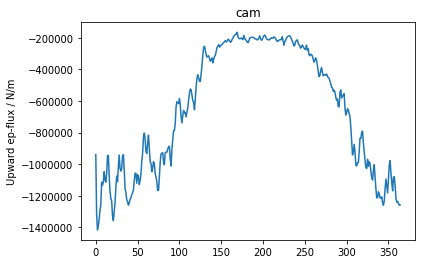

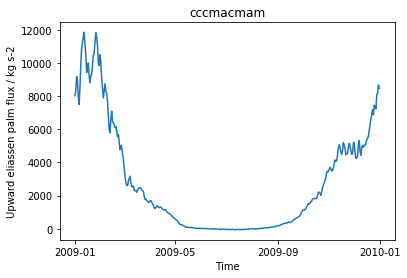

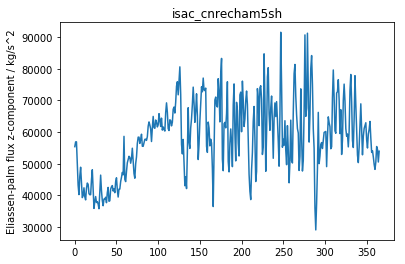

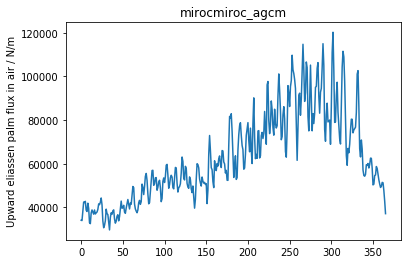

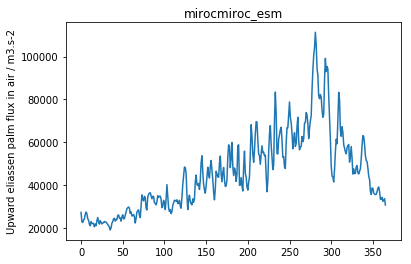

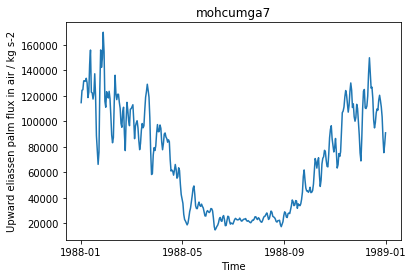

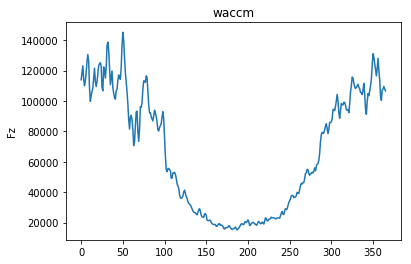

In [43]:
for i, n in enumerate(cdaylist):
    plt.figure()
    print(dayname[i])
    qplt.plot(n[:,0,0,0])
    plt.title(dayname[i])
    plt.tight_layout()
    plt.savefig(f"./figures/{dayname[i]}_fzclim.eps")
    
    

cam_mon
cccmacmam_mon


/home/tyrrell/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


isac_cnrecham5sh_mon
mirocmiroc_agcm_mon
mirocmiroc_esm_mon
mohcumga7_mon
mrimri_esm2_mon
waccm_mon


IndexError: list index out of range

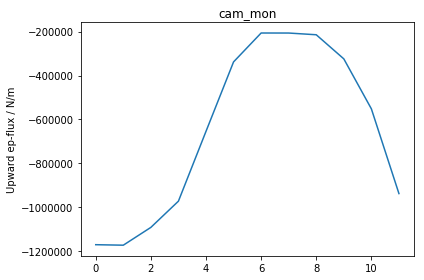

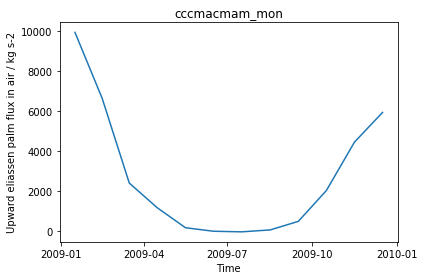

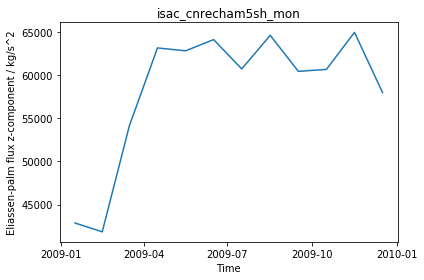

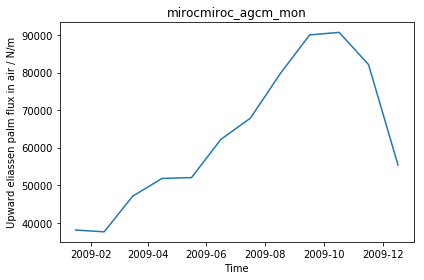

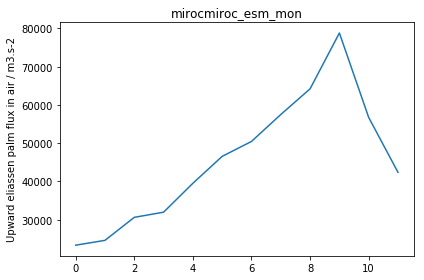

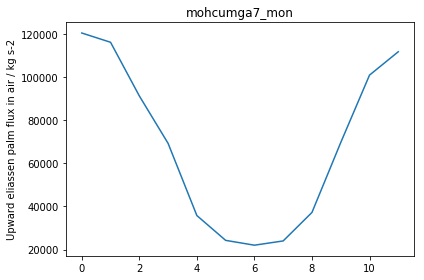

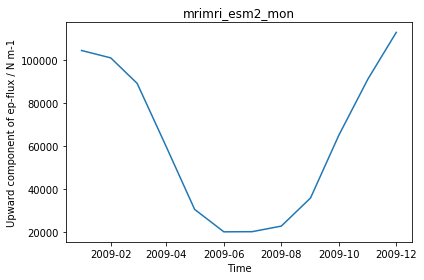

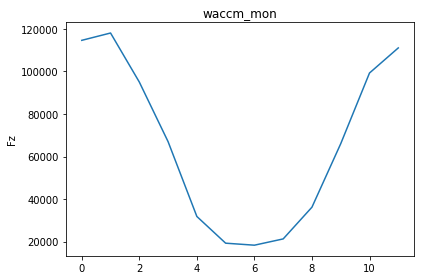

In [44]:
for i, n in enumerate(cmonlist):
    plt.figure()
    print(monname[i])
    qplt.plot(n[:,0,0,0])
    plt.title(monname[i])
    plt.tight_layout()
    #plt.savefig(f"./figures/{dayname[i]}_fzclim.eps")
    
    

/home/tyrrell/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


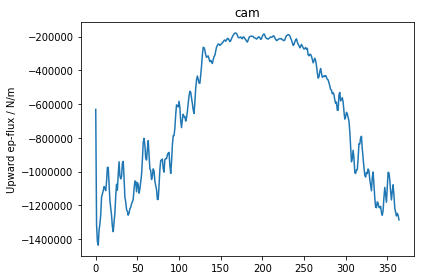

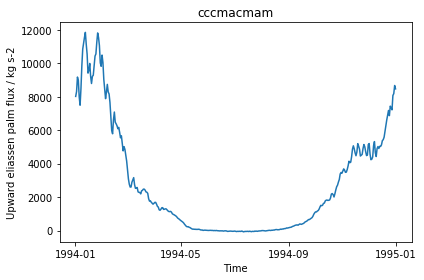

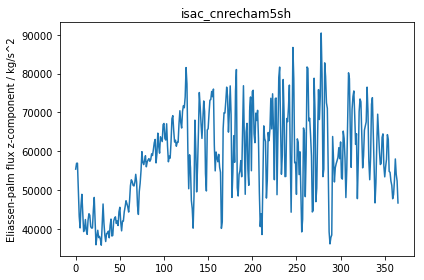

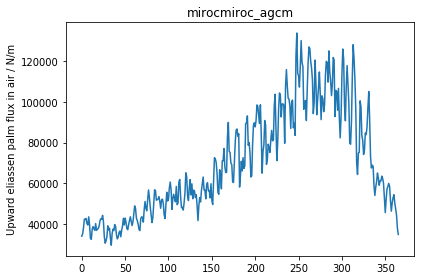

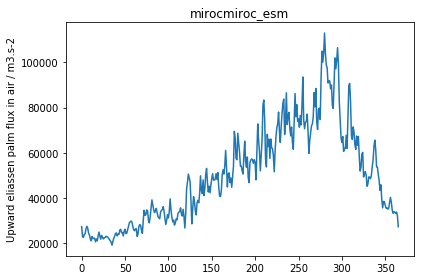

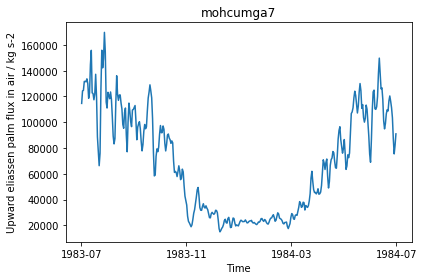

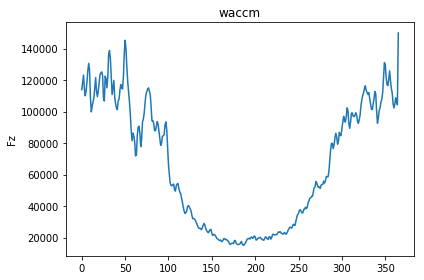

In [46]:
for n, i in enumerate(daylist):
    plt.figure()
    clim = i.aggregated_by('day',iris.analysis.MEAN)
    qplt.plot(clim[:,0,0,0])
    plt.title(dayname[n])
    plt.tight_layout()
    plt.savefig(f"./figures/{dayname[n]}_fzclim.eps")
    
    
    
    

cam
cccmacmam
isac_cnrecham5sh
mirocmiroc_agcm
mirocmiroc_esm
mohcumga7
waccm


/home/tyrrell/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


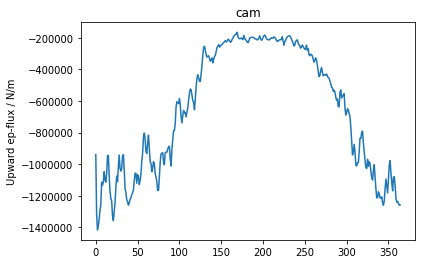

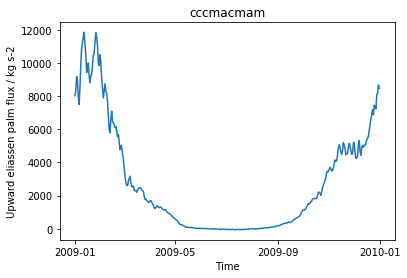

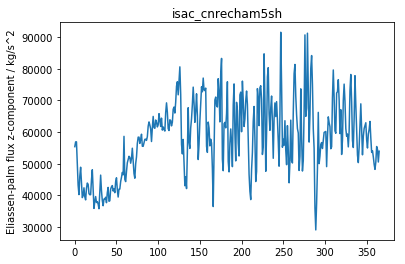

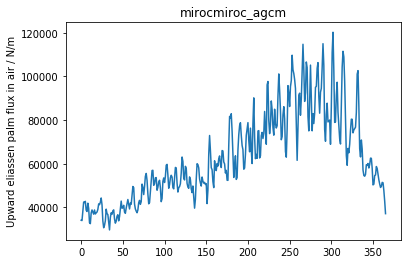

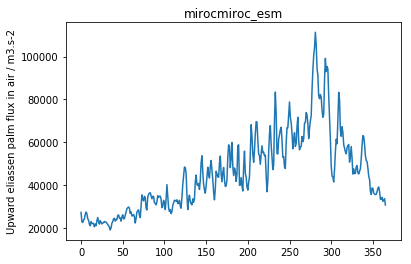

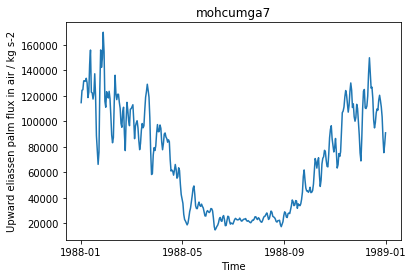

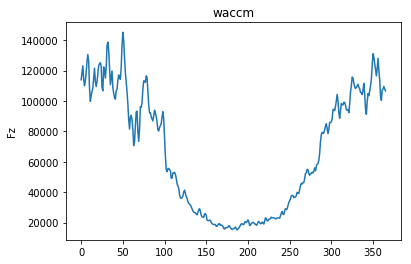

In [39]:
for i, n in enumerate(cdaylist):
    plt.figure()
    print(dayname[i])
    qplt.plot(n[:,0,0,0])
    plt.title(dayname[i])
    
    

upward_eliassen_palm_flux_in_air / (kg s-2) (time: 360; air_pressure: 1; latitude: 1; longitude: 1)
     Dimension coordinates:
          time                                   x                  -            -             -
          air_pressure                           -                  x            -             -
          latitude                               -                  -            x             -
          longitude                              -                  -            -             x
     Auxiliary coordinates:
          day                                    x                  -            -             -
          month                                  x                  -            -             -
          season                                 x                  -            -             -
     Attributes:
          CDI: Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.4 (http://mpimet.mp

/home/tyrrell/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


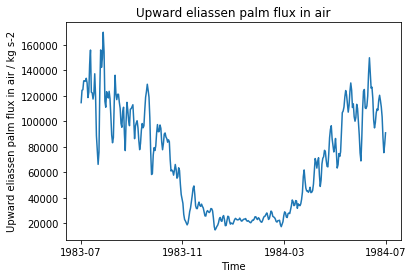

In [20]:
cam_day_clim = mohcumga7.aggregated_by('day',iris.analysis.MEAN)
print(cam_day_clim)
qplt.plot(cam_day_clim[:,0,0,0])

In [35]:
print(cam.attributes)

{'CDI': 'Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/cdi)', 'Conventions': 'CF-1.6', 'history': 'Fri Sep 07 14:57:40 2018: cdo -r fldmean -sellonlatbox,0,0,45.0,75.0 -sellevel,100 /group_workspaces/jasmin2/gotham/cen_qboi/Exp1/CAM/tempfile.nc /group_workspaces/jasmin2/gotham/cen_qboi/Exp1/CAM/v_flux_CAM_QBOiExp1_r1i1p1_day.nc\nFri Sep 07 14:57:28 2018: cdo -b 64 enlarge,r1x192 /group_workspaces/jasmin2/qboi/CAM//QBOiExp1/day/atmos//r1i1p1/fz_ZCAM_QBOiExp1_r1i1p1.nc /group_workspaces/jasmin2/gotham/cen_qboi/Exp1/CAM/tempfile.nc', 'CDO': 'Climate Data Operators version 1.9.4 (http://mpimet.mpg.de/cdo)'}


### Calculate snow extent using Rutgers algorithm

## repeat for Siberia only (not whole eurasia)

In [9]:
sf_sib = snow_frac.extract(iris.Constraint(longitude=lambda lon: 60 < lon < 140,
                                             latitude=lambda lat: 40 < lat < 80))
sf_sib.coord('latitude').guess_bounds()
sf_sib.coord('longitude').guess_bounds()
sf_sib_wtgs = iris.analysis.cartography.area_weights(sf_sib)

sib_snow_ext = sf_sib.collapsed(['latitude','longitude'],iris.analysis.SUM,weights=sf_sib_wtgs)
sib_snow_ext.units  = cf_units.Unit('m^2')

# Convert to km^2
sib_snow_ext.convert_units(cf_units.Unit('km^2'))

sa_sf_sib = sa_snow_frac.extract(iris.Constraint(longitude=lambda lon: 60 < lon < 140,
                                             latitude=lambda lat: 40 < lat < 80))
sa_sf_sib.coord('latitude').guess_bounds()
sa_sf_sib.coord('longitude').guess_bounds()
sa_sf_sib_wtgs = iris.analysis.cartography.area_weights(sa_sf_sib)

sib_sa_snow_ext = sa_sf_sib.collapsed(['latitude','longitude'],iris.analysis.SUM,weights=sa_sf_sib_wtgs)
sib_sa_snow_ext.units  = cf_units.Unit('m^2')

# Convert to km^2
sib_sa_snow_ext.convert_units(cf_units.Unit('km^2'))
#print sa_snow_ext
#print sa_snow_ext_rutgers

#qplt.plot(sa_snow_ext[0:100])
#qplt.plot(sa_snow_ext_rutgers[0:100],color='k')

/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


## Get temperature timeseries for Siberia

In [10]:
era_t2m_sib = era_t2m.extract(iris.Constraint(longitude=lambda lon: 60 < lon < 140,
                                             latitude=lambda lat: 40 < lat < 80))
era_t2m_sib.coord('latitude').guess_bounds()
era_t2m_sib.coord('longitude').guess_bounds()
era_t2m_sib_wtgs = iris.analysis.cartography.area_weights(era_t2m_sib)

sib_era_t2m = era_t2m_sib.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights=era_t2m_sib_wtgs)
mean_sib_era = sib_era_t2m.collapsed('time',iris.analysis.MEAN)
sib_era_t2m_anom = sib_era_t2m.copy()
sib_era_t2m_anom.data = sib_era_t2m.data - mean_sib_era.data

era_skt_sib = era_skt.extract(iris.Constraint(longitude=lambda lon: 60 < lon < 140,
                                             latitude=lambda lat: 40 < lat < 80))
era_skt_sib.coord('latitude').guess_bounds()
era_skt_sib.coord('longitude').guess_bounds()
era_skt_sib_wtgs = iris.analysis.cartography.area_weights(era_skt_sib)

sib_era_skt = era_skt_sib.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights=era_skt_sib_wtgs)
mean_sib_era = sib_era_skt.collapsed('time',iris.analysis.MEAN)
sib_era_skt_anom = sib_era_skt.copy()
sib_era_skt_anom.data = sib_era_skt.data - mean_sib_era.data


ech_t1000_sib = ech_t1000.extract(iris.Constraint(longitude=lambda lon: 60 < lon < 140,
                                             latitude=lambda lat: 40 < lat < 80))
ech_t1000_sib.coord('latitude').guess_bounds()
ech_t1000_sib.coord('longitude').guess_bounds()
ech_t1000_sib_wtgs = iris.analysis.cartography.area_weights(ech_t1000_sib)

sib_ech_t1000 = ech_t1000_sib.collapsed(['latitude','longitude'],iris.analysis.MEAN,weights=ech_t1000_sib_wtgs)
mean_sib_ech = sib_ech_t1000.collapsed('time',iris.analysis.MEAN)
sib_ech_t1000_anom = sib_ech_t1000.copy()
sib_ech_t1000_anom.data = sib_ech_t1000.data - mean_sib_era.data


#qplt.plot(sa_snow_ext[0:100])
#qplt.plot(sa_snow_ext_rutgers[0:100],color='k')

/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/tyrrell/anaconda3/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [11]:
for i in [sib_era_t2m_anom,sib_ech_t1000_anom,sib_snow_ext,sib_era_skt_anom]:
    try:
        iris.coord_categorisation.add_month(i,'time',name='month')
    except ValueError:
        print("Already added month coord for snow")
    try:
        iris.coord_categorisation.add_year(i,'time',name='year')
    except ValueError:
        print("Already added year coord for snow")



## Comparison of Snow Extent and Temperature

In [12]:

month = "Sep"
print(np.corrcoef(sib_ech_t1000_anom.extract(iris.Constraint(month=month)).data,sib_snow_ext.extract(iris.Constraint(month=month)).data))
month = "Oct"
print(np.corrcoef(sib_ech_t1000_anom.extract(iris.Constraint(month=month)).data,sib_snow_ext.extract(iris.Constraint(month=month)).data))
month = "Nov"
print(np.corrcoef(sib_ech_t1000_anom.extract(iris.Constraint(month=month)).data,sib_snow_ext.extract(iris.Constraint(month=month)).data))

[[ 1.         0.4745397]
 [ 0.4745397  1.       ]]
[[ 1.          0.36756567]
 [ 0.36756567  1.        ]]
[[ 1.          0.58572247]
 [ 0.58572247  1.        ]]


## Corr for ERA & Rutgers

In [24]:
sf_month = 'Oct'
rut_month = 10
sibrut.index.month = sibrut['month']

snow_data = sibrut[sibrut.index.month==rut_month]['snow'][12::].values
temp_data = sib_era_t2m_anom.extract(iris.Constraint(month=month))[1::,::].data
#print(sibrut[sibrut.index.month==rut_month][12::])
print(snow_data.shape)
print(temp_data.shape)
#print(sib_era_t2m)

print(np.corrcoef(snow_data,temp_data))


(37,)
(37,)
[[ 1.          0.24635362]
 [ 0.24635362  1.        ]]


-0.6636173909484119
-0.8291831271976016
-0.8897067960723107


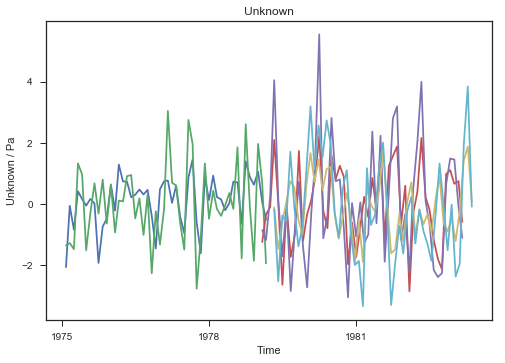

In [31]:
nao_simp_CAM = iris.load("/home/tyrrell/research/qbo/qboi/cen_data/NAO_simp_CAM_QBOiExp1_r1i1p1_mon.nc")[1][:,0,0]
nao_CAM = iris.load_cube("/home/tyrrell/research/qbo/qboi/ncfiles/NAO_CAM_QBOiExp1_r1i1p1_mon.nc")[:,0,0]
qplt.plot(nao_CAM[0:50])
qplt.plot(nao_simp_CAM[0:50]*(-1))
corr = np.corrcoef(nao_CAM.data,nao_simp_CAM.data)
print(corr[0,1])

nao_simp_WACCM = iris.load("/home/tyrrell/research/qbo/qboi/cen_data/NAO_simp_WACCM_QBOiExp1_r1i1p1_mon.nc")[1][:,0,0]
nao_WACCM = iris.load_cube("/home/tyrrell/research/qbo/qboi/ncfiles/NAO_WACCM_QBOiExp1_r1i1p1_mon.nc")[:,0,0]
qplt.plot(nao_WACCM[0:50])
qplt.plot(nao_simp_WACCM[0:50]*(-1))
corr = np.corrcoef(nao_WACCM.data,nao_simp_WACCM.data)
print(corr[0,1])

nao_simp_MOHCUMGA7 = iris.load_cube("/home/tyrrell/research/qbo/qboi/cen_data/NAO_simp_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")[:,0,0]
nao_MOHCUMGA7 = iris.load_cube("/home/tyrrell/research/qbo/qboi/ncfiles/NAO_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")[:,0,0]
qplt.plot(nao_MOHCUMGA7[0:50])
qplt.plot(nao_simp_MOHCUMGA7[0:50]*(-1))
corr = np.corrcoef(nao_MOHCUMGA7.data,nao_simp_MOHCUMGA7.data)
print(corr[0,1])

nao_simp_MOHCUMGA7 = iris.load_cube("/home/tyrrell/research/qbo/qboi/cen_data/NAO_simp_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")[:,0,0]
nao_MOHCUMGA7 = iris.load_cube("/home/tyrrell/research/qbo/qboi/ncfiles/NAO_MOHCUMGA7_QBOiExp1_r2i1p1_mon.nc")[:,0,0]
qplt.plot(nao_MOHCUMGA7[0:50])
qplt.plot(nao_simp_MOHCUMGA7[0:50]*(-1))
corr = np.corrcoef(nao_MOHCUMGA7.data,nao_simp_MOHCUMGA7.data)
print(corr[0,1])





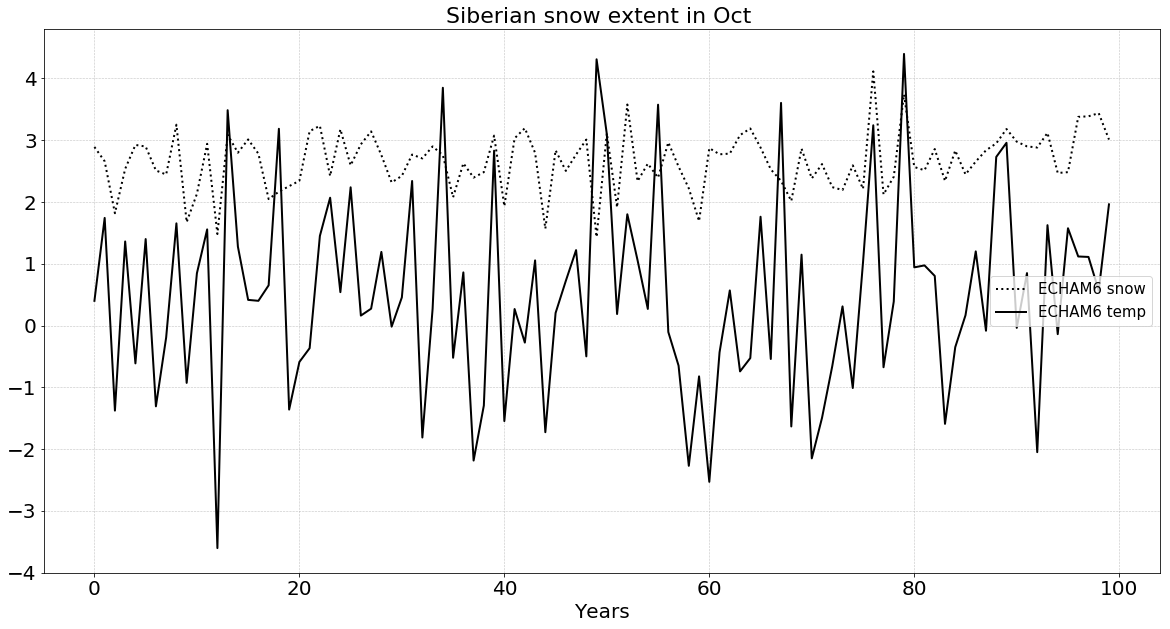

In [60]:
sf_month = 'Oct'
rut_month = 10
sibrut.index.month = sibrut['month']

fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,1,1)
#plt.plot(sibrut[sibrut.index.month==rut_month]['snow'].values/1,color='b',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(sib_snow_ext.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 snow',linewidth=2,linestyle=':')
plt.plot(sib_ech_t1000_anom.extract(iris.Constraint(month=sf_month)).data+45,color='k',label='ECHAM6 temp',linewidth=2)
#plt.plot(snow_ext.extract(iris.Constraint(month=sf_month)).data,'b',label='snow extent')
plt.title('Siberian snow extent in {} '.format(sf_month),fontsize=22)
#plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc=5,fontsize=15)
plt.grid('on',ls='--')
#plt.text(1,19.3,'(d)',fontsize=30)
#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1a_snowext_echRut_{}_bw.png'.format(sf_month))


## Seasonality comparison

## black and white

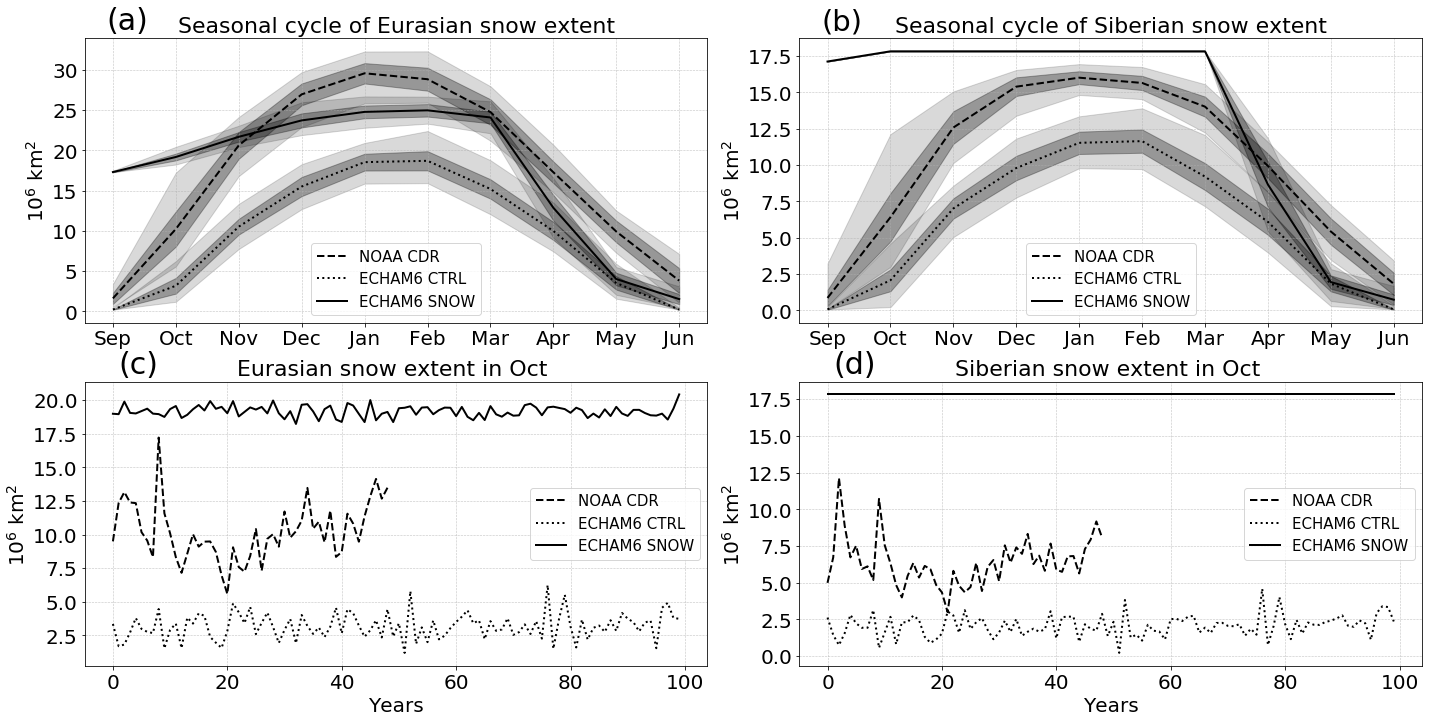

In [12]:

sibrut.index.month = sibrut['month']
#rut_mon = rut[rut.index.month==rut_month]

sf_month = 'Oct'
rut_month = 10

fig = plt.figure(figsize=(20,10))

fig.add_subplot(2,2,4)
plt.plot(sibrut[sibrut.index.month==rut_month]['snow'].values/1,color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(sib_snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(sib_sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 SNOW',linewidth=2)
#plt.plot(snow_ext.extract(iris.Constraint(month=sf_month)).data,'b',label='snow extent')
plt.title('Siberian snow extent in {} '.format(sf_month),fontsize=22)
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc=5,fontsize=15)
plt.grid('on',ls='--')
plt.text(1,19.3,'(d)',fontsize=30)
#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1a_snowext_echRut_{}_bw.png'.format(sf_month))



sa_sf_mon = sib_sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month))
sfrut_mon = sib_snow_ext_rutgers.extract(iris.Constraint(month=sf_month))

sib_sa_sf_clim = np.tile(sib_sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sib_sfrut_clim = np.tile(sib_snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sib_sa_sf_std = np.tile(sib_sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sib_sfrut_std = np.tile(sib_snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sib_sa_sf_max = np.tile(sib_sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sib_sfrut_max = np.tile(sib_snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sib_sa_sf_min = np.tile(sib_sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)
sib_sfrut_min = np.tile(sib_snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)

sibrut.index.month = sibrut['month']
sibrut_mon = sibrut[sibrut.index.month==rut_month]
sibrut_clim =np.tile(sibrut.groupby(sibrut.index.month).mean()['snow'].values/1,2)
sibrut_std = np.tile(sibrut.groupby(sibrut.index.month).std()['snow'].values/1,2)
sibrut_max = np.tile(sibrut.groupby(sibrut.index.month).max()['snow'].values/1,2)
sibrut_min = np.tile(sibrut.groupby(sibrut.index.month).min()['snow'].values/1,2)
mon = np.linspace(0,23,24)

fig.add_subplot(2,2,2)
#plt.plot(snow_ext.data[-100:-1],'b',label='snow extent')
#plt.plot(sa_snow_ext.data[0:100],'g',label='Snow anom snow extent')
plt.plot(mon[0:10],sibrut_clim[8:18],color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(mon[0:10],sib_sfrut_clim[8:18],color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(mon[0:10],sib_sa_sf_clim[0:10],color='k',label='ECHAM6 SNOW',linewidth=2)
plt.title('Seasonal cycle of Siberian snow extent',fontsize=22)
plt.xticks(mon[0:10],['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],fontsize=20)
plt.yticks(fontsize=20)
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.legend(loc=8,fontsize=15) 
plt.grid('on',ls='--')

plt.fill_between(mon[0:10],sibrut_max[8:18],
                 sibrut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sib_sfrut_max[8:18],
                 sib_sfrut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sib_sa_sf_max[0:10],
                 sib_sa_sf_min[0:10],color='k',alpha=0.15)

plt.fill_between(mon[0:10],sib_sa_sf_clim[0:10]+sib_sa_sf_std[0:10],
                 sib_sa_sf_clim[0:10]-sib_sa_sf_std[0:10],color='k',alpha=0.3)
plt.fill_between(mon[0:10],sibrut_clim[8:18]+sibrut_std[8:18],
                 sibrut_clim[8:18]-sibrut_std[8:18],color='k',alpha=0.3)
plt.fill_between(mon[0:10],sib_sfrut_clim[8:18]+sib_sfrut_std[8:18],
                 sib_sfrut_clim[8:18]-sib_sfrut_std[8:18],color='k',alpha=0.3)
plt.text(-0.1,19.3,'(b)',fontsize=29)
plt.tight_layout()

#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1_snowextent_bw.png')



rut.index.month = rut['month']
#rut_mon = rut[rut.index.month==rut_month]

sf_month = 'Oct'
rut_month = 10

#fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,2,3)
plt.plot(rut[rut.index.month==rut_month]['snow'].values/1e6,color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 SNOW',linewidth=2)
#plt.plot(snow_ext.extract(iris.Constraint(month=sf_month)).data,'b',label='snow extent')
plt.title('Eurasian snow extent in {} '.format(sf_month),fontsize=22)
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc=5,fontsize=15)
plt.grid('on',ls='--')
plt.text(1,22,'(c)',fontsize=30)
#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1a_snowext_echRut_{}_bw.png'.format(sf_month))



sa_sf_mon = sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month))
sfrut_mon = snow_ext_rutgers.extract(iris.Constraint(month=sf_month))

sa_sf_clim = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sfrut_clim = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sa_sf_std = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sfrut_std = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sa_sf_max = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sfrut_max = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sa_sf_min = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)
sfrut_min = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)

rut.index.month = rut['month']
rut_mon = rut[rut.index.month==rut_month]
rut_clim = np.tile(rut.groupby(rut.index.month).mean()['snow'].values/1e6,2)
rut_std = np.tile(rut.groupby(rut.index.month).std()['snow'].values/1e6,2)
rut_max = np.tile(rut.groupby(rut.index.month).max()['snow'].values/1e6,2)
rut_min = np.tile(rut.groupby(rut.index.month).min()['snow'].values/1e6,2)
mon = np.linspace(0,23,24)

fig.add_subplot(2,2,1)
#plt.plot(snow_ext.data[-100:-1],'b',label='snow extent')
#plt.plot(sa_snow_ext.data[0:100],'g',label='Snow anom snow extent')
plt.plot(mon[0:10],rut_clim[8:18],color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(mon[0:10],sfrut_clim[8:18],color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(mon[0:10],sa_sf_clim[0:10],color='k',label='ECHAM6 SNOW',linewidth=2)
plt.title('Seasonal cycle of Eurasian snow extent',fontsize=22)
plt.xticks(mon[0:10],['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],fontsize=20)
plt.yticks(fontsize=20)
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.legend(loc=8,fontsize=15) 
plt.grid('on',ls='--')

plt.fill_between(mon[0:10],rut_max[8:18],
                 rut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sfrut_max[8:18],
                 sfrut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sa_sf_max[0:10],
                 sa_sf_min[0:10],color='k',alpha=0.15)

plt.fill_between(mon[0:10],sa_sf_clim[0:10]+sa_sf_std[0:10],
                 sa_sf_clim[0:10]-sa_sf_std[0:10],color='k',alpha=0.3)
plt.fill_between(mon[0:10],rut_clim[8:18]+rut_std[8:18],
                 rut_clim[8:18]-rut_std[8:18],color='k',alpha=0.3)
plt.fill_between(mon[0:10],sfrut_clim[8:18]+sfrut_std[8:18],
                 sfrut_clim[8:18]-sfrut_std[8:18],color='k',alpha=0.3)
plt.text(-0.1,35,'(a)',fontsize=30)
plt.tight_layout()

#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1_sibsnowextent_bw.eps')
#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1_sibsnowextent_bw.png')


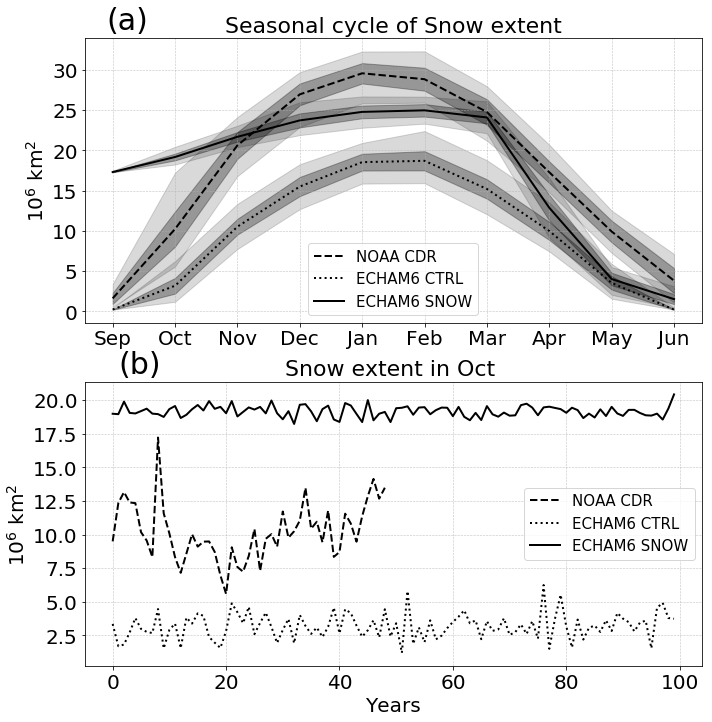

In [8]:

rut.index.month = rut['month']
#rut_mon = rut[rut.index.month==rut_month]

sf_month = 'Oct'
rut_month = 10

fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,1,2)
plt.plot(rut[rut.index.month==rut_month]['snow'].values/1e6,color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month)).data/1e6,color='k',label='ECHAM6 SNOW',linewidth=2)
#plt.plot(snow_ext.extract(iris.Constraint(month=sf_month)).data,'b',label='snow extent')
plt.title('Snow extent in {} '.format(sf_month),fontsize=22)
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc=5,fontsize=15)
plt.grid('on',ls='--')
plt.text(1,22,'(b)',fontsize=30)
#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1a_snowext_echRut_{}_bw.png'.format(sf_month))



sa_sf_mon = sa_snow_ext_rutgers.extract(iris.Constraint(month=sf_month))
sfrut_mon = snow_ext_rutgers.extract(iris.Constraint(month=sf_month))

sa_sf_clim = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sfrut_clim = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MEAN).data/1e6,2)
sa_sf_std = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sfrut_std = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.STD_DEV).data/1e6,2)
sa_sf_max = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sfrut_max = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MAX).data/1e6,2)
sa_sf_min = np.tile(sa_snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)
sfrut_min = np.tile(snow_ext_rutgers.aggregated_by('month',iris.analysis.MIN).data/1e6,2)

rut.index.month = rut['month']
rut_mon = rut[rut.index.month==rut_month]
rut_clim = np.tile(rut.groupby(rut.index.month).mean()['snow'].values/1e6,2)
rut_std = np.tile(rut.groupby(rut.index.month).std()['snow'].values/1e6,2)
rut_max = np.tile(rut.groupby(rut.index.month).max()['snow'].values/1e6,2)
rut_min = np.tile(rut.groupby(rut.index.month).min()['snow'].values/1e6,2)
mon = np.linspace(0,23,24)

fig.add_subplot(2,1,1)
#plt.plot(snow_ext.data[-100:-1],'b',label='snow extent')
#plt.plot(sa_snow_ext.data[0:100],'g',label='Snow anom snow extent')
plt.plot(mon[0:10],rut_clim[8:18],color='k',label='NOAA CDR',linewidth=2,linestyle='--')
plt.plot(mon[0:10],sfrut_clim[8:18],color='k',label='ECHAM6 CTRL',linewidth=2,linestyle=':')
plt.plot(mon[0:10],sa_sf_clim[0:10],color='k',label='ECHAM6 SNOW',linewidth=2)
plt.title('Seasonal cycle of Snow extent',fontsize=22)
plt.xticks(mon[0:10],['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],fontsize=20)
plt.yticks(fontsize=20)
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.ylabel(r'$10^6$ km$^2$',fontsize=20)
plt.legend(loc=8,fontsize=15) 
plt.grid('on',ls='--')

plt.fill_between(mon[0:10],rut_max[8:18],
                 rut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sfrut_max[8:18],
                 sfrut_min[8:18],color='k',alpha=0.15)
plt.fill_between(mon[0:10],sa_sf_max[0:10],
                 sa_sf_min[0:10],color='k',alpha=0.15)

plt.fill_between(mon[0:10],sa_sf_clim[0:10]+sa_sf_std[0:10],
                 sa_sf_clim[0:10]-sa_sf_std[0:10],color='k',alpha=0.3)
plt.fill_between(mon[0:10],rut_clim[8:18]+rut_std[8:18],
                 rut_clim[8:18]-rut_std[8:18],color='k',alpha=0.3)
plt.fill_between(mon[0:10],sfrut_clim[8:18]+sfrut_std[8:18],
                 sfrut_clim[8:18]-sfrut_std[8:18],color='k',alpha=0.3)
plt.text(-0.1,35,'(a)',fontsize=30)
plt.tight_layout()

#plt.savefig('/home/tyrrell/research/writing/SnowQBO_paper/figures/fig1_snowextent_bw.png')
